In [2]:
dataset = pd.read_csv(r'C:\Users\pujar_rd15uog\Simple-ML End-End Project\Dataset\Algerian_forest_fires_cleaned_dataset.csv')
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
dataset.drop(['day', 'month','year'], axis=1, inplace=True)
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# Normalize text (lowercase, strip whitespace)
dataset['Classes'] =dataset['Classes'].str.strip().str.lower()

# Optional: Check unique values after normalization
print(dataset['Classes'].value_counts())

# Map to binary classes
dataset['Classes'] =dataset['Classes'].map({'fire': 1, 'not fire': 0})

# Check the result
print(dataset['Classes'].value_counts())


fire        137
not fire    106
Name: Classes, dtype: int64
1    137
0    106
Name: Classes, dtype: int64


In this we are trying to make FWI as dependent features or target variable and the rest of the features will be independent features

In [5]:
x=dataset.drop('FWI',axis=1)
y=dataset['FWI']
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)



In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [7]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


If two independent features are co-related .It means those two features are almost same.Why do we need two similar features.so we will drop one.

1.Multi Colinearlity-If features are highly correlated then we can drop one of the independent features. 

<Figure size 720x576 with 0 Axes>

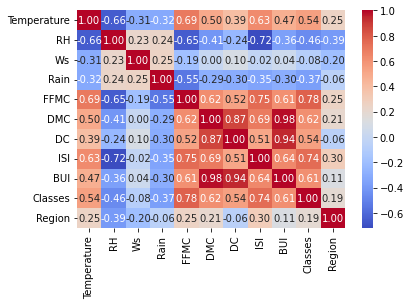

<Figure size 720x576 with 0 Axes>

In [8]:
sns.heatmap(x_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.figure(figsize=(10, 8))

In [9]:
def correlation(dataset,threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute correlation
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(x_train, 0.8)

In [11]:
corr_features

{'BUI', 'DC'}

In [12]:
#dropping the correlated features
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)

Feature scaling or Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [14]:
x_train_scaled.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071


Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.98
Mean Squared Error: 0.67


c:\Users\pujar_rd15uog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\pujar_rd15uog\AppData\Local\Temp\ipykernel_11644\564431901.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_test, y_pred,cmap='coolwarm', edgecolors='k', alpha=0.7)


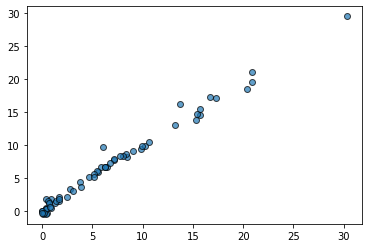

In [ ]:
plt.scatter(y_test, y_pred,)  

Lasso R-squared: 0.98
Lasso Mean Squared Error: 0.96


c:\Users\pujar_rd15uog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


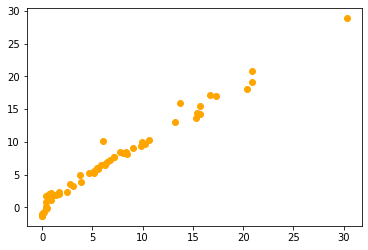

In [18]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(x_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso R-squared: {r2_lasso:.2f}")
print(f"Lasso Mean Squared Error: {mse_lasso:.2f}")
plt.scatter(y_test, y_pred_lasso, color='orange')

Cross Validation: When ever we have a dataset it will be splitting into train and test.The further split of train in to train and validation.The train data is specifically used for training the model.The validation data is used for hyperparameter tuning.For example there are 100 train points and if cross validation =5.The data points will split into 5, iteratively each of the set will act as validation one to check accuracy

LassoCV R-squared: 0.98
LassoCV Mean Squared Error: 0.79


c:\Users\pujar_rd15uog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


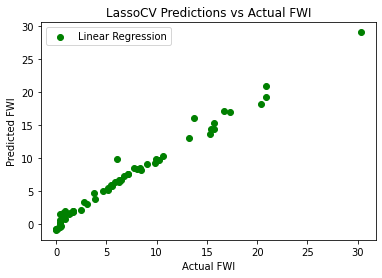

In [19]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv_model.fit(x_train_scaled, y_train)
y_pred_lasso_cv = lasso_cv_model.predict(x_test_scaled)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
print(f"LassoCV R-squared: {r2_lasso_cv:.2f}")
print(f"LassoCV Mean Squared Error: {mse_lasso_cv:.2f}")
plt.scatter(y_test, y_pred_lasso_cv, color='green')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('LassoCV Predictions vs Actual FWI')
plt.legend(['Linear Regression', 'Lasso', 'LassoCV'])
plt.show()

Ridge R-squared: 0.98
Ridge Mean Squared Error: 0.68


c:\Users\pujar_rd15uog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


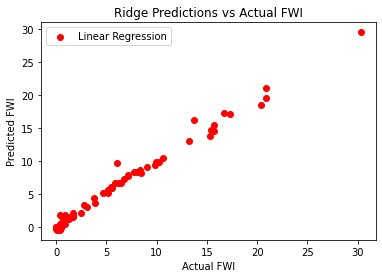

In [20]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(x_test_scaled)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge R-squared: {r2_ridge:.2f}")
print(f"Ridge Mean Squared Error: {mse_ridge:.2f}")
plt.scatter(y_test, y_pred_ridge, color='red')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Ridge Predictions vs Actual FWI')
plt.legend(['Linear Regression', 'Lasso', 'LassoCV', 'Ridge'])
plt.show()

RidgeCV R-squared: 0.98
RidgeCV Mean Squared Error: 0.81


c:\Users\pujar_rd15uog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


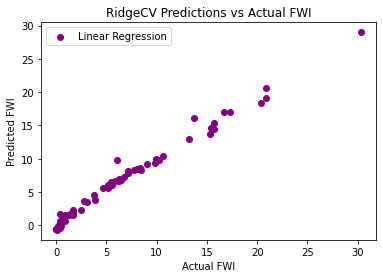

In [21]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=5)
ridge_cv_model.fit(x_train_scaled, y_train)
y_pred_ridge_cv = ridge_cv_model.predict(x_test_scaled)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
print(f"RidgeCV R-squared: {r2_ridge_cv:.2f}")
print(f"RidgeCV Mean Squared Error: {mse_ridge_cv:.2f}")
plt.scatter(y_test, y_pred_ridge_cv, color='purple')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('RidgeCV Predictions vs Actual FWI')
plt.legend(['Linear Regression', 'Lasso', 'LassoCV', 'Ridge', 'RidgeCV'])
plt.show()

ElasticNet R-squared: 0.97
ElasticNet Mean Squared Error: 1.12


c:\Users\pujar_rd15uog\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


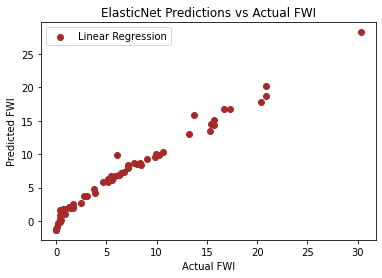

In [22]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(x_train_scaled, y_train)
y_pred_elastic_net = elastic_net_model.predict(x_test_scaled)
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)
print(f"ElasticNet R-squared: {r2_elastic_net:.2f}")
print(f"ElasticNet Mean Squared Error: {mse_elastic_net:.2f}")
plt.scatter(y_test, y_pred_elastic_net, color='brown')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('ElasticNet Predictions vs Actual FWI')
plt.legend(['Linear Regression', 'Lasso', 'LassoCV', 'Ridge', 'RidgeCV', 'ElasticNet'])
plt.show()


Pickle the Machine Learning Model

In [23]:
ridge_model = Ridge(alpha=0.1)
scaler = StandardScaler()

In [24]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

pickle.dump(ridge_model, open('ridge_model.pkl', 'wb'))

In [25]:
!pip install jinja2
!pip install mlflow
import mlflow
import mlflow.sklearn